<a href="https://colab.research.google.com/github/RiskiSaraan/Tugas-Python_1101190123_Muhammad-Riski-Saraan/blob/main/1101190123_TugasPython10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls


'absen iot2.jpg'
'Bukti kehadiran .jpeg'
'Bukti kehadiran.jpeg'
'Bukti SS.jpeg'
 Classroom/
'Colab Notebooks'/
'Getting started.pdf'
 IMG20190911172337.jpg
'IMG20190911172337 - Muhammad Riski Saraan.jpg'
'Kehadiran Asterisk.jpeg'
 kehadiran.jpg
'Klinik Asterisk Kehadiran.jpeg'
 OK/
'PPT DAN RESUME MEKANISME PERSALINAN D4 KEBIDANAN TK 2.rar'
 Screenshot_20200718-221629_WhatsApp.jpg
 Screenshot_20200725-094748_Zoom.jpg
 Screenshot_20200801-110057_Zoom.jpg
 Screenshot_20200801-212631_Zoom.jpg
 Screenshot_20200808-104856_Zoom.jpg
 Screenshot_20200808-145726_Zoom.jpg
 Screenshot_20200808-212520_Zoom.jpg
 Screenshot_20200815-100552_Zoom.jpg
'Screenshot 2020-10-08 183457.png'
 Screenshot_20201018-124948_WhatsApp.jpg
'SELASA(3)_TT06(D)_MUHAMMAD RISKI SARAAN_1101190123_KAP.jpg'
'SELASA(3)_TT06(D)_MUHAMMAD RISKI SARAAN_1101190123_KAP.pdf'
 TT-43-06_1_D-GAME.rar
'TT-43-06 Charger Tenaga Air.gdoc'
'TT4306_MUHAMMAD RISKI SARAAN.pdf'
'WhatsApp Image 2020-07-18 at 10.12.11.jpeg'
'WhatsApp Image 2020-

In [4]:
import numpy as np
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
print("Files imported successfully!")

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

Files imported successfully!


In [5]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "An image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

X = []
X = load_image_files("OK/")


y0 = np.zeros(360)
y1 = np.ones(328)
y2 = np.zeros(260)

y = []
y = np.concatenate((y0,y1,y2), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

X_train: (758, 50, 50, 3)
X_test: (95, 50, 50, 3)
X_val: (95, 50, 50, 3)
y_train: (758,)
y_test: (95,)
y_val: (95,)
X_train: (758, 7500)
X_test: (95, 7500)
X_val: (95, 7500)
y_train: (758,)
y_test: (95,)
y_val: (95,)


In [6]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def predict_label(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances_no_loops(X)

        return self.predict_labels(dists, k=k)

    def compute_distances_no_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt((X ** 2).sum(axis=1, keepdims=1) + (self.X_train ** 2).sum(axis=1) - 2 * X.dot(self.X_train.T))

        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [29]:
print("Validation Accuracy for k = 16")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_val)
y_val_pred = classifier.predict_labels(dists, k= 3 )
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print('%d / %d correct => Accuracy = %f' % (num_correct, num_val, accuracy))

Validation Accuracy for k = 16
72 / 95 correct => Accuracy = 0.757895


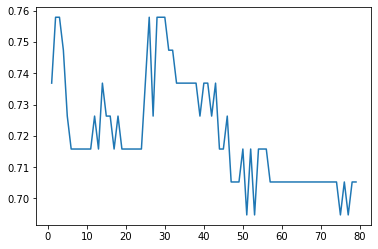

Max. accuracy (0.7578947368421053) at k = 2


In [30]:
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 80):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("Max. accuracy ("+str(acc)+") at k = "+str(index+1))

In [31]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
print("Test Accuracy = "+str(neigh.score(X_test, y_test)))

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_test)
y_test_pred = classifier.predict_labels(dists, k=21)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('With k = 43, %d / %d correct => Accuracy = %f' % (num_correct, num_test, accuracy))

Test Accuracy = 0.7263157894736842
With k = 43, 73 / 95 correct => Accuracy = 0.768421


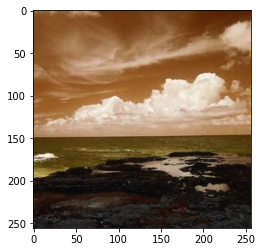

Coast


In [32]:
img = cv.imread("coast_cdmc841.jpg")
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_pred = cv.resize(RGB_img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]*3))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)

dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Coast", "Highway", "Forest"]
y_test_pred = classifier2.predict_labels(dists2, k=1)

plt.imshow(img)
plt.show()
print(labels[int(y_test_pred)])